In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
from scipy.stats import pearsonr
import sys
from pathlib import Path

Converts EBD txt file to a json file where all reports are turned into features

In [1]:
import csv
import json

# Function to read the txt file and create GeoJSON
def create_geojson(input_file, output_file):
    # Initialize a list to hold GeoJSON features
    features = []

    # Open the text file containing the data
    with open(input_file, 'r', newline='', encoding='utf-8') as infile:
        reader = csv.DictReader(infile, delimiter='\t')  # Assuming tab-separated values
        for row in reader:
            # Extract necessary fields from the row
            observation_date = row['OBSERVATION DATE']
            species_reported = row['ALL SPECIES REPORTED']
            latitude = row['LATITUDE']
            longitude = row['LONGITUDE']
            
            # Skip rows where latitude or longitude are missing
            if not latitude or not longitude:
                continue
            
            # Create GeoJSON feature for this row
            feature = {
                "type": "Feature",
                "geometry": {
                    "type": "Point",
                    "coordinates": [float(longitude), float(latitude)]  # Longitude first, then Latitude
                },
                "properties": {
                    "observation_date": observation_date,
                    "species_reported": species_reported
                }
            }

            # Add the feature to the list of features
            features.append(feature)

    # Create the GeoJSON structure
    geojson = {
        "type": "FeatureCollection",
        "features": features
    }

    # Save the GeoJSON data to an output file
    with open(output_file, 'w', encoding='utf-8') as outfile:
        json.dump(geojson, outfile, indent=4)

    print(f"GeoJSON file saved to {output_file}")

# Input and output file paths
# input_file = r'C:\Users\u1355\OneDrive\Desktop\Data Viz\Thesis Website\birds\AMP Full Year\ebd_US-UT-035_amwpel_200401_202312_smp_relJan-2025_sampling.txt'  # Replace with your txt file's path
input_file = r'C:\Users\u1355\OneDrive\Desktop\Data Viz\Thesis Website\birds\EG Full Year\ebd_US-UT_eargre_200401_202312_smp_relDec-2024_sampling.txt'  # Replace with your txt file's path
output_file = r'C:\Users\u1355\OneDrive\Desktop\Data Viz\Thesis Website\birds\eg_geojsons\EG_UT_Year_Avgs2.json'  # Output GeoJSON file path
# output_file = r'C:\Users\u1355\OneDrive\Desktop\Data Viz\Thesis Website\birds\amp_geojsons\AMP_UT_Year_Avgs2.json'  # Output GeoJSON file path


# Call the function to create the GeoJSON
create_geojson(input_file, output_file)


GeoJSON file saved to C:\Users\u1355\OneDrive\Desktop\Data Viz\Thesis Website\birds\eg_geojsons\EG_UT_Year_Avgs2.json


CODE TO MAKE JSON FILES PER MONTH PER YEAR

In [ ]:
import csv
import json
import os

# Function to read the txt file and create separate GeoJSON files for each month of each year
def create_geojson_by_month(input_file, output_directory):
    # Dictionary to hold GeoJSON features categorized by year and month
    monthly_data = {}

    # Open the text file containing the data
    with open(input_file, 'r', newline='', encoding='utf-8') as infile:
        reader = csv.DictReader(infile, delimiter='\t')  # Assuming tab-separated values
        for row in reader:
            # Extract necessary fields from the row
            observation_date = row['OBSERVATION DATE']
            species_reported = row['ALL SPECIES REPORTED']
            latitude = row['LATITUDE']
            longitude = row['LONGITUDE']
            
            # Skip rows where latitude or longitude are missing
            if not latitude or not longitude:
                continue

            # Extract the year and month from the observation date (assuming YYYY-MM-DD format)
            year_month = observation_date[:7]  # Format: YYYY-MM

            # Initialize a new list for the year and month if not present
            if year_month not in monthly_data:
                monthly_data[year_month] = []

            # Create GeoJSON feature for this row
            feature = {
                "type": "Feature",
                "geometry": {
                    "type": "Point",
                    "coordinates": [float(longitude), float(latitude)]  # Longitude first, then Latitude
                },
                "properties": {
                    "observation_date": observation_date,
                    "species_reported": species_reported
                }
            }

            # Add the feature to the corresponding year-month list
            monthly_data[year_month].append(feature)

    # Ensure output directory exists
    os.makedirs(output_directory, exist_ok=True)

    # Create and save separate GeoJSON files for each month of each year
    for year_month, features in monthly_data.items():
        geojson = {
            "type": "FeatureCollection",
            "features": features
        }
        output_file = os.path.join(output_directory, f'AMP_UT_{year_month}.json')
        with open(output_file, 'w', encoding='utf-8') as outfile:
            json.dump(geojson, outfile, indent=4)
        print(f"GeoJSON file saved to {output_file}")

# Input and output paths

input_file = r'C:\Users\u1355\OneDrive\Desktop\Data Viz\Thesis Website\birds\AMP Full Year\ebd_US-UT_amwpel_200401_202312_smp_relFeb-2024_sampling.txt'
output_directory = r'C:\Users\u1355\OneDrive\Desktop\Data Viz\Thesis Website\birds\amp_geojsons\monthly_UT_jsons2'  # Output directory for GeoJSON files

# Call the function to create the GeoJSONs per month of each year
create_geojson_by_month(input_file, output_directory)


GeoJSON file saved to C:\Users\u1355\OneDrive\Desktop\Data Viz\Thesis Website\birds\amp_geojsons\monthly_UT_jsons2\AMP_UT_2023-05.json
GeoJSON file saved to C:\Users\u1355\OneDrive\Desktop\Data Viz\Thesis Website\birds\amp_geojsons\monthly_UT_jsons2\AMP_UT_2023-10.json
GeoJSON file saved to C:\Users\u1355\OneDrive\Desktop\Data Viz\Thesis Website\birds\amp_geojsons\monthly_UT_jsons2\AMP_UT_2023-03.json
GeoJSON file saved to C:\Users\u1355\OneDrive\Desktop\Data Viz\Thesis Website\birds\amp_geojsons\monthly_UT_jsons2\AMP_UT_2023-04.json
GeoJSON file saved to C:\Users\u1355\OneDrive\Desktop\Data Viz\Thesis Website\birds\amp_geojsons\monthly_UT_jsons2\AMP_UT_2023-06.json
GeoJSON file saved to C:\Users\u1355\OneDrive\Desktop\Data Viz\Thesis Website\birds\amp_geojsons\monthly_UT_jsons2\AMP_UT_2023-07.json
GeoJSON file saved to C:\Users\u1355\OneDrive\Desktop\Data Viz\Thesis Website\birds\amp_geojsons\monthly_UT_jsons2\AMP_UT_2023-11.json
GeoJSON file saved to C:\Users\u1355\OneDrive\Desktop\D

Reports total species and total checklists for each month_year json

In [55]:
import json
import os

# Function to calculate total species and checklists for each month
def report_species_and_checklists(input_directory):
    # Dictionary to store total species count and checklist count per year-month
    monthly_report = {}

    # Loop through all GeoJSON files in the input directory
    for filename in os.listdir(input_directory):
        if filename.endswith('.json'):  # Only process GeoJSON files
            file_path = os.path.join(input_directory, filename)
            
            with open(file_path, 'r', encoding='utf-8') as infile:
                data = json.load(infile)
                features = data.get('features', [])
                
                # Extract the year-month from the filename (assuming it's in the format AMP_UT_YYYY-MM.json)
                year_month = filename[7:15]
                
                # Initialize the dictionary for the year-month if not present
                if year_month not in monthly_report:
                    monthly_report[year_month] = {'total_species': 0, 'checklists_count': 0}

                # Loop through each feature to sum up the species and count the checklists
                for feature in features:
                    species_reported = feature['properties'].get('species_reported', '0')

                    # Convert species_reported to an integer (may be a string)
                    try:
                        species_reported = int(species_reported)
                    except ValueError:
                        species_reported = 0  # In case of any invalid value, set to 0

                    # Update the totals
                    monthly_report[year_month]['total_species'] += species_reported
                    monthly_report[year_month]['checklists_count'] += 1

    # Report the totals for each month
    for year_month, report in monthly_report.items():
        total_species = report['total_species']
        checklists_count = report['checklists_count']
        print(f"{year_month}: Total Species = {total_species}, Total Checklists = {checklists_count}")


# Input directory where the GeoJSON files are stored
amp_directory = r'C:\Users\u1355\OneDrive\Desktop\Data Viz\Thesis Website\birds\amp_geojsons\monthly_UT_jsons'  # Directory of GeoJSON files
eg_directory = r'C:\Users\u1355\OneDrive\Desktop\Data Viz\Thesis Website\birds\eg_geojsons\monthly_AZ_jsons'
# Call the function to report the total species and checklists
# report_species_and_checklists(amp_directory)
report_species_and_checklists(eg_directory)

004-01.j: Total Species = 276, Total Checklists = 543
004-02.j: Total Species = 256, Total Checklists = 540
004-03.j: Total Species = 276, Total Checklists = 772
004-04.j: Total Species = 514, Total Checklists = 1177
004-05.j: Total Species = 408, Total Checklists = 1032
004-06.j: Total Species = 325, Total Checklists = 743
004-07.j: Total Species = 385, Total Checklists = 923
004-08.j: Total Species = 481, Total Checklists = 1148
004-09.j: Total Species = 215, Total Checklists = 509
004-10.j: Total Species = 237, Total Checklists = 514
004-11.j: Total Species = 159, Total Checklists = 355
004-12.j: Total Species = 244, Total Checklists = 492
005-01.j: Total Species = 327, Total Checklists = 682
005-02.j: Total Species = 354, Total Checklists = 630
005-03.j: Total Species = 423, Total Checklists = 943
005-04.j: Total Species = 520, Total Checklists = 1179
005-05.j: Total Species = 664, Total Checklists = 1568
005-06.j: Total Species = 287, Total Checklists = 618
005-07.j: Total Species

Compares # of exact matches and prints these out between month_year jsons

In [58]:
import json
import os

# Function to aggregate total species and checklists for each month from GeoJSON files
def aggregate_data(input_directory, filename_start_index=8):
    monthly_data = {}

    # Loop through all files in the directory
    for filename in os.listdir(input_directory):
        if filename.endswith('.json'):  # Only process .json files
            file_path = os.path.join(input_directory, filename)
            
            with open(file_path, 'r', encoding='utf-8') as infile:
                data = json.load(infile)
                features = data.get('features', [])
                
                # Extract year-month from the filename (AMP_UT_YYYY-MM.json or EG_UT_YYYY-MM.json)
                year_month = filename[filename_start_index:filename_start_index+7]  # Ensure consistent length
                
                # Initialize if not already present
                if year_month not in monthly_data:
                    monthly_data[year_month] = {'total_species': 0, 'checklists_count': 0}

                # Process each feature to aggregate species and checklists
                for feature in features:
                    species_reported = feature['properties'].get('species_reported', '0')

                    # Convert species_reported to an integer
                    try:
                        species_reported = int(species_reported)
                    except ValueError:
                        species_reported = 0  # Invalid species reported value

                    # Update totals
                    monthly_data[year_month]['total_species'] += species_reported
                    monthly_data[year_month]['checklists_count'] += 1

    return monthly_data

# Function to compare the aggregated data from both directories (AMP and EG)
def compare_exact_matches(amp_data, eg_data):
    exact_matches = 0
    total_comparisons = 0
    matching_months = []  # To store exact matches

    # Compare data between AMP and EG
    for month in amp_data:
        amp_species = amp_data[month]['total_species']
        amp_checklists = amp_data[month]['checklists_count']
        
        eg_species = eg_data.get(month, {}).get('total_species', 0)
        eg_checklists = eg_data.get(month, {}).get('checklists_count', 0)

        # Debugging prints to check the month comparison
        if month not in eg_data:
            print(f"{month} is missing in EG data")
        
        # Compare exact species and checklist counts
        if amp_species == eg_species and amp_checklists == eg_checklists:
            exact_matches += 1
            matching_months.append((month, amp_species, amp_checklists))  # Store the matching months
        
        total_comparisons += 1

    # Output the result
    print(f"Total months compared: {total_comparisons}")
    print(f"Exact matches: {exact_matches}")
    print(f"Match percentage: {exact_matches / total_comparisons * 100:.2f}%")
    
    # Print out the exact matches found
    print("\nExact Matches Found:")
    for month, species, checklists in matching_months:
        print(f"{month}: Species: {species}, Checklists: {checklists}")

# Directories for AMP and EG data
amp_directory = r'C:\Users\u1355\OneDrive\Desktop\Data Viz\Thesis Website\birds\amp_geojsons\monthly_UT_jsons'
eg_directory = r'C:\Users\u1355\OneDrive\Desktop\Data Viz\Thesis Website\birds\eg_geojsons\monthly_UT_jsons'

# Aggregate data for both AMP and EG (adjust the starting index for filename parsing)
amp_data = aggregate_data(amp_directory, filename_start_index=8)  # AMP files start at index 8
eg_data = aggregate_data(eg_directory, filename_start_index=7)   # EG files start at index 7

# Compare the exact matches between AMP and EG datasets
compare_exact_matches(amp_data, eg_data)


Total months compared: 240
Exact matches: 29
Match percentage: 12.08%

Exact Matches Found:
004-07.: Species: 116, Checklists: 275
004-09.: Species: 82, Checklists: 190
004-12.: Species: 67, Checklists: 109
005-01.: Species: 78, Checklists: 158
005-02.: Species: 72, Checklists: 180
005-03.: Species: 80, Checklists: 162
005-07.: Species: 142, Checklists: 332
005-10.: Species: 65, Checklists: 144
006-01.: Species: 78, Checklists: 165
006-03.: Species: 175, Checklists: 237
006-08.: Species: 173, Checklists: 306
006-11.: Species: 167, Checklists: 229
007-01.: Species: 143, Checklists: 270
007-03.: Species: 158, Checklists: 357
007-06.: Species: 321, Checklists: 533
007-07.: Species: 142, Checklists: 319
008-12.: Species: 300, Checklists: 400
009-03.: Species: 584, Checklists: 767
009-11.: Species: 320, Checklists: 433
010-02.: Species: 489, Checklists: 598
011-01.: Species: 1111, Checklists: 1321
011-04.: Species: 1286, Checklists: 1680
011-11.: Species: 791, Checklists: 940
012-01.: Speci

Creates GSL filtered data and prints # of total checklists and # total species reported for 

In [3]:
import json

# Function to filter data based on latitude and longitude
def filter_coordinates(features, min_lat, max_lat, min_lon, max_lon):
    filtered_features = []
    
    for feature in features:
        # Extracting the coordinates from the geometry
        coordinates = feature.get('geometry', {}).get('coordinates', [])
        
        # Ensure that there are exactly two elements (longitude, latitude)
        if len(coordinates) == 2:
            longitude, latitude = coordinates

            # Check if the point lies within the specified coordinates
            if min_lat <= latitude <= max_lat and min_lon <= longitude <= max_lon:
                filtered_features.append(feature)
    
    return filtered_features

# Load the existing JSON file
input_filename = 'C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/amp_geojsons/AMP_UT_Year_Avgs.json'  # Your file path
output_filename = 'C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/amp_geojsons/filtered_AMP_UT_Year_Avgs2.json'  # Output file path

# Define the latitude and longitude boundaries (40° to 42° North, 112° to 113° West)
min_latitude = 40.0
max_latitude = 42.0
min_longitude = -113.0
max_longitude = -112.0

# Read the JSON data from the file
with open(input_filename, 'r') as file:
    try:
        data = json.load(file)
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)

# Access the 'features' part of the JSON structure
features = data.get('features', [])

# Filter the data based on coordinates
filtered_features = filter_coordinates(features, min_latitude, max_latitude, min_longitude, max_longitude)

# Prepare the output structure
filtered_data = {
    "type": "FeatureCollection",
    "features": filtered_features
}

# Count total species and checklists
total_species = 0
total_checklists = len(filtered_features)  # Each feature represents a checklist

for feature in filtered_features:
    species_reported = feature['properties'].get('species_reported', 0)
    try:
        total_species += int(species_reported)
    except ValueError:
        continue  # Skip if species_reported is not a valid number

print(f"Total checklists: {total_checklists}")
print(f"Total species reported: {total_species}")


# Save the filtered data to a new JSON file
with open(output_filename, 'w') as output_file:
    json.dump(filtered_data, output_file, indent=4)

print(f"Filtered data has been saved to {output_filename}")


Total checklists: 104672
Total species reported: 86633
Filtered data has been saved to C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/amp_geojsons/filtered_AMP_UT_Year_Avgs2.json


Prints # of total checklists and # total species reported for GSL filtered data for each month of each year

In [68]:
import json

# Function to filter data based on latitude and longitude
def filter_coordinates(features, min_lat, max_lat, min_lon, max_lon):
    filtered_features = []
    
    for feature in features:
        # Extracting the coordinates from the geometry
        coordinates = feature.get('geometry', {}).get('coordinates', [])
        
        # Ensure that there are exactly two elements (longitude, latitude)
        if len(coordinates) == 2:
            longitude, latitude = coordinates

            # Check if the point lies within the specified coordinates
            if min_lat <= latitude <= max_lat and min_lon <= longitude <= max_lon:
                filtered_features.append(feature)
    
    return filtered_features

# Load the existing JSON file
input_filename = 'C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/eg_geojsons/EG_UT_Year_Avgs.json'  # Your file path
output_filename = 'C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/eg_geojsons/filtered_EG_UT_Year_Avgs2.json'  # Output file path

# Define the latitude and longitude boundaries (40° to 42° North, 112° to 113° West)
min_latitude = 40.0
max_latitude = 42.0
min_longitude = -113.0
max_longitude = -112.0

# Read the JSON data from the file
with open(input_filename, 'r') as file:
    try:
        data = json.load(file)
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        exit(1)

# Access the 'features' part of the JSON structure
features = data.get('features', [])

# Filter the data based on coordinates
filtered_features = filter_coordinates(features, min_latitude, max_latitude, min_longitude, max_longitude)

# Prepare the output structure
filtered_data = {
    "type": "FeatureCollection",
    "features": filtered_features
}

from collections import defaultdict
from datetime import datetime

# Initialize dictionary to hold monthly totals
monthly_stats = defaultdict(lambda: {"total_species": 0, "total_checklists": 0})

# Process each feature
for feature in filtered_features:
    props = feature.get('properties', {})
    obs_date = props.get('observation_date', '')
    species_reported = props.get('species_reported', '0')

    try:
        date_obj = datetime.strptime(obs_date, "%Y-%m-%d")
        year_month = date_obj.strftime("%Y-%m")
    except ValueError:
        continue  # Skip invalid dates

    try:
        species_count = int(species_reported)
    except ValueError:
        species_count = 0

    monthly_stats[year_month]["total_species"] += species_count
    monthly_stats[year_month]["total_checklists"] += 1

# Print the results
print("Month-Year | Total Species Reported | Total Checklists")
for ym in sorted(monthly_stats.keys()):
    stats = monthly_stats[ym]
    print(f"{ym} | {stats['total_species']} | {stats['total_checklists']}")



# Save the filtered data to a new JSON file
with open(output_filename, 'w') as output_file:
    json.dump(filtered_data, output_file, indent=4)

print(f"Filtered data has been saved to {output_filename}")


Month-Year | Total Species Reported | Total Checklists
2004-01 | 18 | 25
2004-02 | 13 | 27
2004-03 | 18 | 23
2004-04 | 35 | 66
2004-05 | 32 | 57
2004-06 | 25 | 46
2004-07 | 27 | 71
2004-08 | 31 | 86
2004-09 | 14 | 44
2004-10 | 35 | 48
2004-11 | 18 | 26
2004-12 | 11 | 16
2005-01 | 7 | 13
2005-02 | 9 | 19
2005-03 | 15 | 21
2005-04 | 48 | 83
2005-05 | 33 | 67
2005-06 | 22 | 38
2005-07 | 27 | 80
2005-08 | 42 | 91
2005-09 | 33 | 69
2005-10 | 18 | 38
2005-11 | 12 | 27
2005-12 | 13 | 20
2006-01 | 13 | 22
2006-02 | 33 | 49
2006-03 | 32 | 38
2006-04 | 36 | 63
2006-05 | 52 | 83
2006-06 | 36 | 55
2006-07 | 35 | 53
2006-08 | 40 | 66
2006-09 | 114 | 156
2006-10 | 61 | 80
2006-11 | 29 | 40
2006-12 | 37 | 56
2007-01 | 47 | 70
2007-02 | 38 | 64
2007-03 | 42 | 65
2007-04 | 55 | 77
2007-05 | 42 | 95
2007-06 | 19 | 41
2007-07 | 28 | 50
2007-08 | 49 | 82
2007-09 | 64 | 82
2007-10 | 63 | 83
2007-11 | 48 | 66
2007-12 | 22 | 51
2008-01 | 69 | 100
2008-02 | 54 | 83
2008-03 | 70 | 102
2008-04 | 84 | 149
2008-0

Plots filtered GSL data for comparison with plot made in gsl_birds_plot (they align)

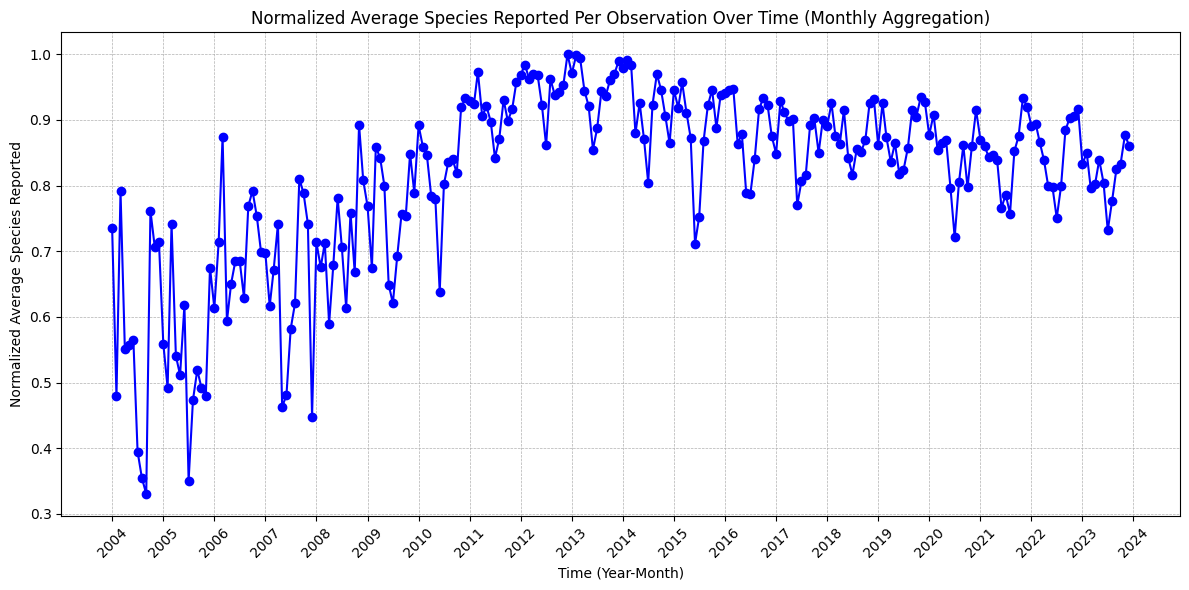

In [70]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import defaultdict
from datetime import datetime

# Load the filtered data from the JSON file
# output_filename = 'C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/amp_geojsons/filtered_AMP_UT_Year_Avgs.json'  # Your output file path
output_filename = 'C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/amp_geojsons/filtered_AMP_UT_Year_Avgs.json'  # Your output file path


with open(output_filename, 'r') as file:
    filtered_data = json.load(file)

# Extract features from the filtered data
features = filtered_data.get('features', [])

# Dictionary to store sum of species and number of observations per (year, month)
species_by_month = defaultdict(lambda: {'total_species': 0, 'num_observations': 0})

# Process each feature to extract the observation date and species reported
for feature in features:
    observation_date = feature['properties'].get('observation_date', '')
    species_reported = feature['properties'].get('species_reported', '0')

    # Convert species_reported to an integer (it may be a string in the data)
    try:
        species_reported = int(species_reported)
    except ValueError:
        continue  # Skip if species_reported is not a valid number
    
    # Extract the year and month from observation_date
    try:
        date_obj = datetime.strptime(observation_date, '%Y-%m-%d')
        year_month = date_obj.strftime('%Y-%m')  # Format as YYYY-MM
        species_by_month[year_month]['total_species'] += species_reported  # Add species to total
        species_by_month[year_month]['num_observations'] += 1  # Increment the observation count
    except ValueError:
        continue  # Skip if the date format is invalid

# Sort months in ascending order
months = sorted(species_by_month.keys())

# Calculate the average species reported per observation
average_species_counts = []
for month in months:
    total_species = species_by_month[month]['total_species']
    num_observations = species_by_month[month]['num_observations']
    
    # Calculate the average species per observation (avoid division by zero)
    if num_observations > 0:
        average_species = total_species / num_observations
    else:
        average_species = 0
    average_species_counts.append(average_species)

# Normalize the average species counts (min-max scaling)
max_average_species = max(average_species_counts) if average_species_counts else 1  # Avoid division by zero
average_species_counts_normalized = [count / max_average_species for count in average_species_counts]

# Convert months to datetime format for better plotting
dates = [datetime.strptime(month, "%Y-%m") for month in months]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(dates, average_species_counts_normalized, marker='o', linestyle='-', color='b')

# Formatting the x-axis to show all months and years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Show years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Year labels

plt.title('Normalized Average Species Reported Per Observation Over Time (Monthly Aggregation)')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Normalized Average Species Reported')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
# plt.show()
# plt.savefig('C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/climate_birds_viz/scaled_EG_over_years.png')


For GSL filtered data, prints out total species reported and # total checklists for every month of every year. Used as baseline to check similarity factor between GSL data for Grebes and Pelicans.

Month: 2004-01, Total Species: 17, Checklists: 24
Month: 2004-02, Total Species: 12, Checklists: 26
Month: 2004-03, Total Species: 16, Checklists: 21
Month: 2004-04, Total Species: 35, Checklists: 66
Month: 2004-05, Total Species: 29, Checklists: 54
Month: 2004-06, Total Species: 25, Checklists: 46
Month: 2004-07, Total Species: 27, Checklists: 71
Month: 2004-08, Total Species: 28, Checklists: 82
Month: 2004-09, Total Species: 14, Checklists: 44
Month: 2004-10, Total Species: 33, Checklists: 45
Month: 2004-11, Total Species: 17, Checklists: 25
Month: 2004-12, Total Species: 11, Checklists: 16
Month: 2005-01, Total Species: 7, Checklists: 13
Month: 2005-02, Total Species: 9, Checklists: 19
Month: 2005-03, Total Species: 15, Checklists: 21
Month: 2005-04, Total Species: 38, Checklists: 73
Month: 2005-05, Total Species: 33, Checklists: 67
Month: 2005-06, Total Species: 22, Checklists: 37
Month: 2005-07, Total Species: 27, Checklists: 80
Month: 2005-08, Total Species: 41, Checklists: 90
Mo

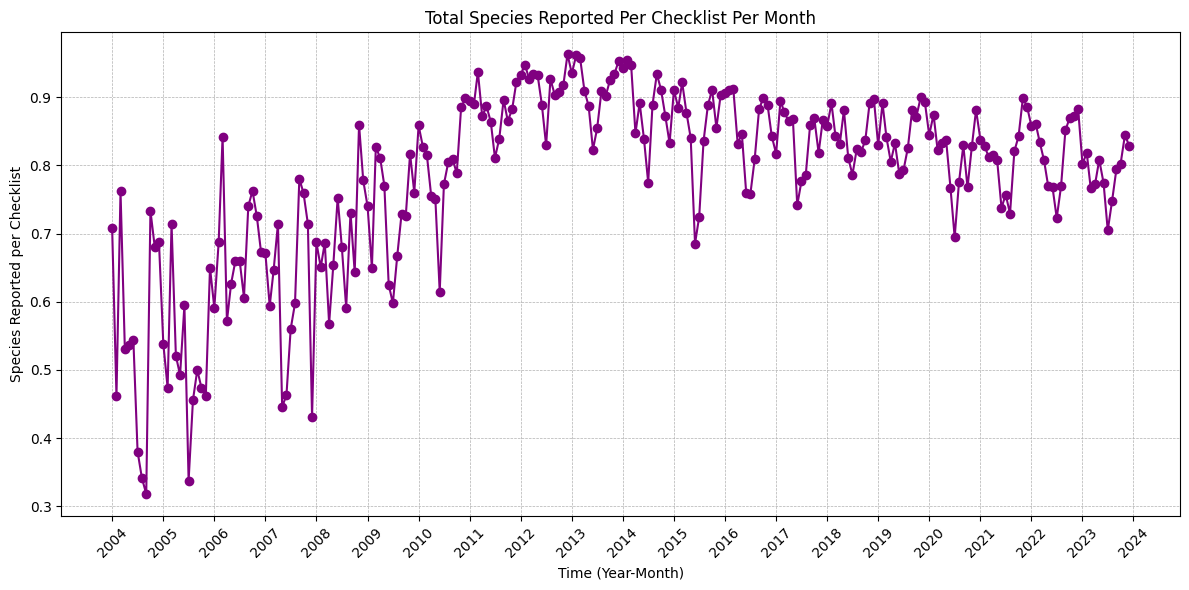

In [2]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import defaultdict
from datetime import datetime

# Load the filtered data from the JSON file
output_filename = 'C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/amp_geojsons/filtered_AMP_UT_Year_Avgs.json'

with open(output_filename, 'r') as file:
    filtered_data = json.load(file)

# Extract features from the filtered data
features = filtered_data.get('features', [])

# Dictionaries to store total species count and checklist counts per month
species_by_month = defaultdict(int)
checklists_by_month = defaultdict(int)

# Process each feature to extract the observation date and species reported
for feature in features:
    observation_date = feature['properties'].get('observation_date', '')
    species_reported = feature['properties'].get('species_reported', '0')

    try:
        species_reported = int(species_reported)
        date_obj = datetime.strptime(observation_date, '%Y-%m-%d')
        year_month = date_obj.strftime('%Y-%m')  # Format as YYYY-MM

        species_by_month[year_month] += species_reported
        checklists_by_month[year_month] += 1  # Each feature = one checklist

    except (ValueError, TypeError):
        continue  # Skip if data is malformed

# Sort months chronologically
months = sorted(species_by_month.keys())

# Debug: Log the raw counts of species and checklists for each month
for month in months:
    print(f"Month: {month}, Total Species: {species_by_month[month]}, Checklists: {checklists_by_month[month]}")

# Calculate scaled species per checklist (total species reported per checklist)
species_scaled = []
for month in months:
    total_species = species_by_month[month]
    num_checklists = checklists_by_month[month]

    if num_checklists > 0:
        species_per_checklist = total_species / num_checklists
    else:
        species_per_checklist = 0
    
    species_scaled.append(species_per_checklist)

# Debug: Log the scaled species per checklist
for month, scaled_value in zip(months, species_scaled):
    print(f"Month: {month}, Scaled Species per Checklist: {scaled_value}")

# Convert to datetime for plotting
dates = [datetime.strptime(month, "%Y-%m") for month in months]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(dates, species_scaled, marker='o', linestyle='-', color='purple')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title('Total Species Reported Per Checklist Per Month')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Species Reported per Checklist')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show plot
plt.show()


Month: 2004-01, Total Species: 18, Checklists: 25
Month: 2004-02, Total Species: 13, Checklists: 27
Month: 2004-03, Total Species: 18, Checklists: 23
Month: 2004-04, Total Species: 35, Checklists: 66
Month: 2004-05, Total Species: 32, Checklists: 57
Month: 2004-06, Total Species: 25, Checklists: 46
Month: 2004-07, Total Species: 27, Checklists: 71
Month: 2004-08, Total Species: 31, Checklists: 86
Month: 2004-09, Total Species: 14, Checklists: 44
Month: 2004-10, Total Species: 35, Checklists: 48
Month: 2004-11, Total Species: 18, Checklists: 26
Month: 2004-12, Total Species: 11, Checklists: 16
Month: 2005-01, Total Species: 7, Checklists: 13
Month: 2005-02, Total Species: 9, Checklists: 19
Month: 2005-03, Total Species: 15, Checklists: 21
Month: 2005-04, Total Species: 48, Checklists: 83
Month: 2005-05, Total Species: 33, Checklists: 67
Month: 2005-06, Total Species: 22, Checklists: 38
Month: 2005-07, Total Species: 27, Checklists: 80
Month: 2005-08, Total Species: 42, Checklists: 91
Mo

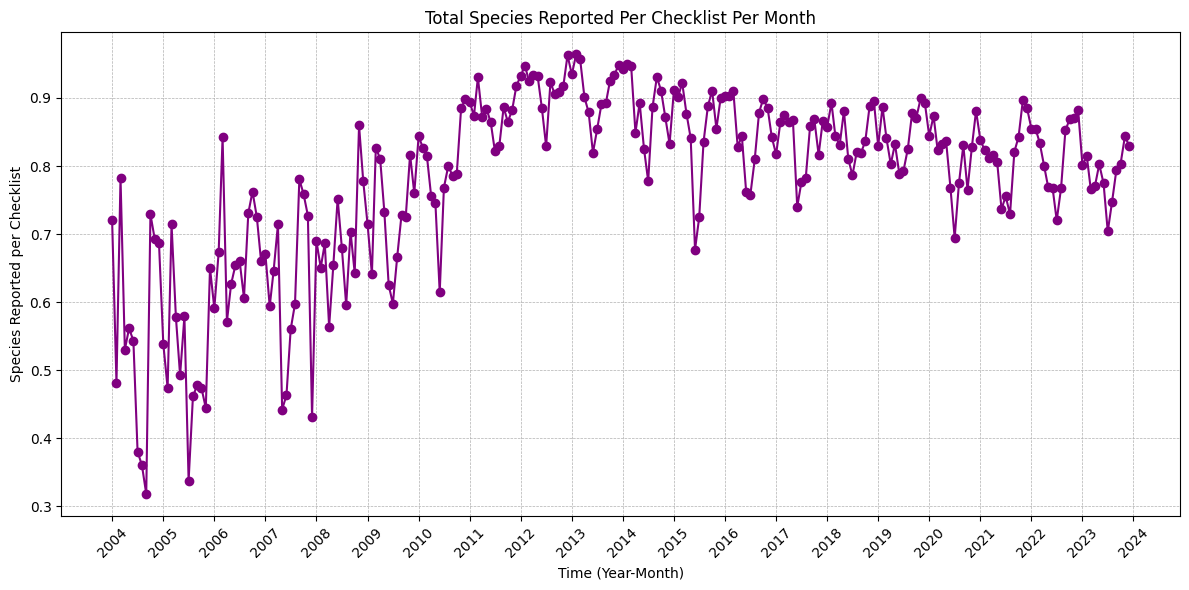

In [39]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import defaultdict
from datetime import datetime

# Load the filtered data from the JSON file
output_filename = 'C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/eg_geojsons/filtered_EG_UT_Year_Avgs.json'

with open(output_filename, 'r') as file:
    filtered_data = json.load(file)

# Extract features from the filtered data
features = filtered_data.get('features', [])

# Dictionaries to store total species count and checklist counts per month
species_by_month = defaultdict(int)
checklists_by_month = defaultdict(int)

# Process each feature to extract the observation date and species reported
for feature in features:
    observation_date = feature['properties'].get('observation_date', '')
    species_reported = feature['properties'].get('species_reported', '0')

    try:
        species_reported = int(species_reported)
        date_obj = datetime.strptime(observation_date, '%Y-%m-%d')
        year_month = date_obj.strftime('%Y-%m')  # Format as YYYY-MM

        species_by_month[year_month] += species_reported
        checklists_by_month[year_month] += 1  # Each feature = one checklist

    except (ValueError, TypeError):
        continue  # Skip if data is malformed

# Sort months chronologically
months = sorted(species_by_month.keys())

# Debug: Log the raw counts of species and checklists for each month
for month in months:
    print(f"Month: {month}, Total Species: {species_by_month[month]}, Checklists: {checklists_by_month[month]}")

# Calculate scaled species per checklist (total species reported per checklist)
species_scaled = []
for month in months:
    total_species = species_by_month[month]
    num_checklists = checklists_by_month[month]

    if num_checklists > 0:
        species_per_checklist = total_species / num_checklists
    else:
        species_per_checklist = 0
    
    species_scaled.append(species_per_checklist)

# Debug: Log the scaled species per checklist
for month, scaled_value in zip(months, species_scaled):
    print(f"Month: {month}, Scaled Species per Checklist: {scaled_value}")

# Convert to datetime for plotting
dates = [datetime.strptime(month, "%Y-%m") for month in months]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(dates, species_scaled, marker='o', linestyle='-', color='purple')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title('Total Species Reported Per Checklist Per Month')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Species Reported per Checklist')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show plot
plt.show()


Investigating species reported for GSL against SST data

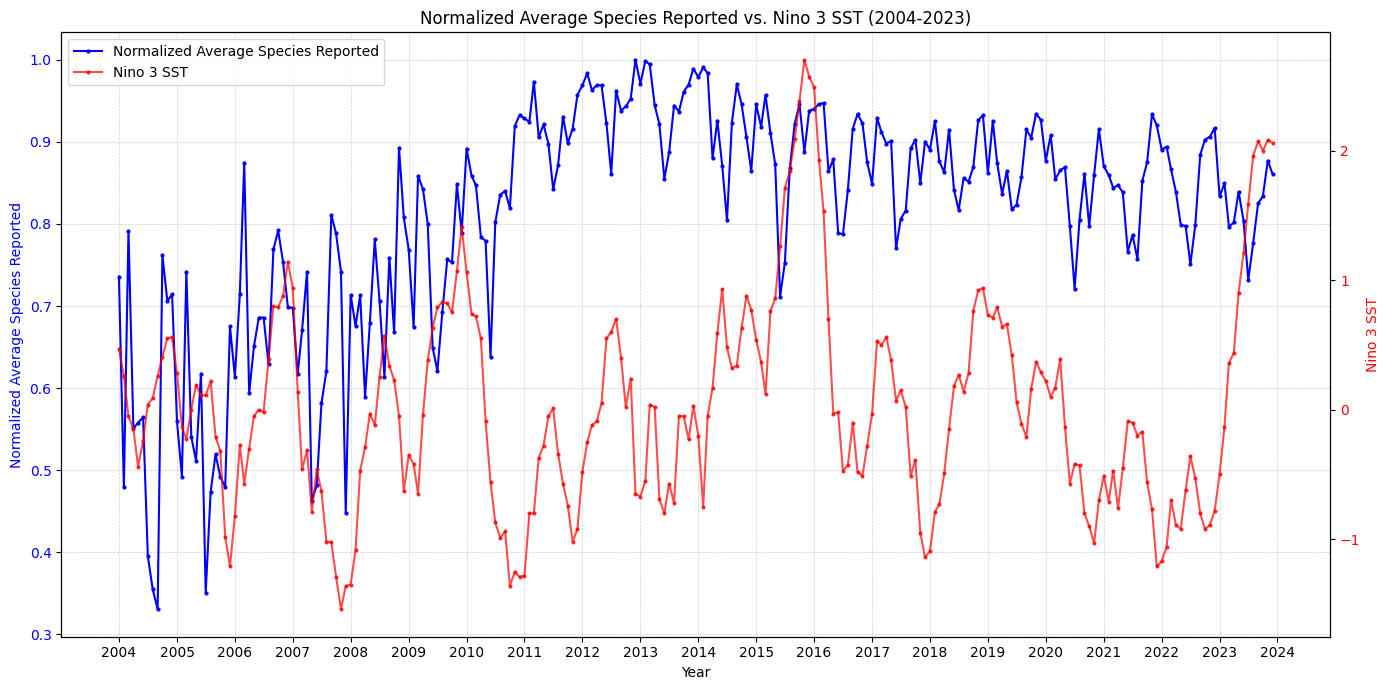

In [6]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import defaultdict
from datetime import datetime

# Load the filtered data from the JSON file (bird observation data)
output_filename = 'C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/amp_geojsons/filtered_AMP_UT_Year_Avgs.json'

with open(output_filename, 'r') as file:
    filtered_data = json.load(file)

# Extract features from the filtered data
features = filtered_data.get('features', [])

# Dictionary to store sum of species and number of observations per (year, month)
species_by_month = defaultdict(lambda: {'total_species': 0, 'num_observations': 0})

# Process each feature to extract the observation date and species reported
for feature in features:
    observation_date = feature['properties'].get('observation_date', '')
    species_reported = feature['properties'].get('species_reported', '0')

    # Convert species_reported to an integer
    try:
        species_reported = int(species_reported)
    except ValueError:
        continue  # Skip if species_reported is not a valid number
    
    # Extract the year and month from observation_date
    try:
        date_obj = datetime.strptime(observation_date, '%Y-%m-%d')
        year_month = date_obj.strftime('%Y-%m')  # Format as YYYY-MM
        species_by_month[year_month]['total_species'] += species_reported
        species_by_month[year_month]['num_observations'] += 1
    except ValueError:
        continue  # Skip if the date format is invalid

# Sort months in ascending order
months = sorted(species_by_month.keys())

# Calculate the average species reported per observation
dates = []
average_species_counts = []

for month in months:
    total_species = species_by_month[month]['total_species']
    num_observations = species_by_month[month]['num_observations']
    
    # Calculate the average species per observation
    if num_observations > 0:
        average_species = total_species / num_observations
    else:
        average_species = 0
    
    date_obj = datetime.strptime(month, "%Y-%m")
    dates.append(date_obj)
    average_species_counts.append(average_species)

# Normalize the average species counts (min-max scaling)
max_average_species = max(average_species_counts) if average_species_counts else 1
average_species_counts_normalized = [count / max_average_species for count in average_species_counts]

# Read the Nino 3 data from the SST file
nino3_data = {}
with open('C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/climate_data/sst_data.txt', 'r') as file:
    next(file)  # Skip the header line
    for line in file:
        parts = line.strip().split()
        try:
            year = int(parts[0])
            month = int(parts[1])
            nino3 = float(parts[5])  # Extract the 6th value (Nino 3)
            
            # Store all monthly data between 2004 and 2023
            if 2004 <= year <= 2023:
                date_key = datetime(year, month, 1)
                nino3_data[date_key] = nino3
        except (ValueError, IndexError):
            continue  # Skip lines with invalid data

# Sort the Nino 3 data by date
sorted_nino3_dates = sorted(nino3_data.keys())
nino3_values = [nino3_data[date] for date in sorted_nino3_dates]

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the normalized species counts (primary y-axis)
ax1.plot(dates, average_species_counts_normalized, marker='.', linestyle='-', color='b', 
         label='Normalized Average Species Reported', markersize=4)
ax1.set_xlabel('Year')
ax1.set_ylabel('Normalized Average Species Reported', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create secondary y-axis for Nino 3 SST data
ax2 = ax1.twinx()
ax2.plot(sorted_nino3_dates, nino3_values, marker='.', linestyle='-', color='r', 
         label='Nino 3 SST', alpha=0.7, markersize=4)
ax2.set_ylabel('Nino 3 SST', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Formatting the x-axis
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Add a legend for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Title and grid
plt.title('Normalized Average Species Reported vs. Nino 3 SST (2004-2023)')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

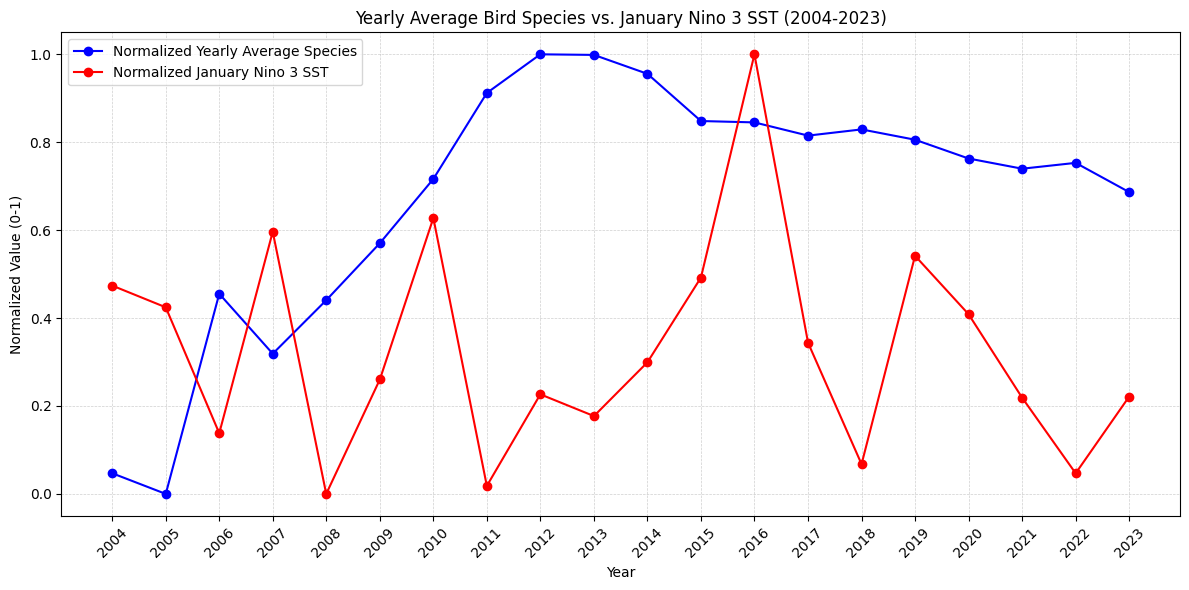

Year | Bird Species Avg | Normalized | Nino 3 Jan | Normalized
-----------------------------------------------------------------
2004 | 0.51 | 0.05 | 0.47 | 0.47
2005 | 0.49 | 0.00 | 0.28 | 0.42
2006 | 0.68 | 0.46 | -0.82 | 0.14
2007 | 0.63 | 0.32 | 0.94 | 0.60
2008 | 0.68 | 0.44 | -1.35 | 0.00
2009 | 0.73 | 0.57 | -0.35 | 0.26
2010 | 0.80 | 0.72 | 1.06 | 0.63
2011 | 0.88 | 0.91 | -1.28 | 0.02
2012 | 0.92 | 1.00 | -0.48 | 0.23
2013 | 0.92 | 1.00 | -0.67 | 0.18
2014 | 0.90 | 0.96 | -0.20 | 0.30
2015 | 0.86 | 0.85 | 0.54 | 0.49
2016 | 0.85 | 0.85 | 2.49 | 1.00
2017 | 0.84 | 0.82 | -0.03 | 0.34
2018 | 0.85 | 0.83 | -1.09 | 0.07
2019 | 0.84 | 0.81 | 0.73 | 0.54
2020 | 0.82 | 0.76 | 0.22 | 0.41
2021 | 0.81 | 0.74 | -0.51 | 0.22
2022 | 0.81 | 0.75 | -1.17 | 0.05
2023 | 0.79 | 0.69 | -0.50 | 0.22


In [8]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import defaultdict
from datetime import datetime

# Load the filtered data from the JSON file (bird observation data)
output_filename = 'C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/amp_geojsons/filtered_AMP_UT_Year_Avgs.json'

with open(output_filename, 'r') as file:
    filtered_data = json.load(file)

# Extract features from the filtered data
features = filtered_data.get('features', [])

# Dictionary to store sum of species and number of observations per year
species_by_year = defaultdict(lambda: {'total_species': 0, 'num_observations': 0})

# Process each feature to extract the observation date and species reported
for feature in features:
    observation_date = feature['properties'].get('observation_date', '')
    species_reported = feature['properties'].get('species_reported', '0')

    # Convert species_reported to an integer
    try:
        species_reported = int(species_reported)
    except ValueError:
        continue  # Skip if species_reported is not a valid number
    
    # Extract the year from observation_date
    try:
        date_obj = datetime.strptime(observation_date, '%Y-%m-%d')
        year = date_obj.year
        species_by_year[year]['total_species'] += species_reported
        species_by_year[year]['num_observations'] += 1
    except ValueError:
        continue  # Skip if the date format is invalid

# Sort years in ascending order
years = sorted(species_by_year.keys())

# Calculate the average species reported per observation for each year
years_datetime = []
average_species_by_year = []

for year in years:
    total_species = species_by_year[year]['total_species']
    num_observations = species_by_year[year]['num_observations']
    
    # Calculate the average species per observation for the year
    if num_observations > 0:
        average_species = total_species / num_observations
    else:
        average_species = 0
    
    # Create a datetime object for January 1st of each year for plotting
    date_obj = datetime(year, 1, 1)
    years_datetime.append(date_obj)
    average_species_by_year.append(average_species)

# Read the Nino 3 data from the SST file, only for January of each year
nino3_january_data = {}
with open('C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/climate_data/sst_data.txt', 'r') as file:
    next(file)  # Skip the header line
    for line in file:
        parts = line.strip().split()
        try:
            year = int(parts[0])
            month = int(parts[1])
            nino3 = float(parts[5])  # Extract the 6th value (Nino 3)
            
            # Only store January (month == 1) data between 2004 and 2023
            if 2004 <= year <= 2023 and month == 1:
                date_key = datetime(year, 1, 1)
                nino3_january_data[date_key] = nino3
        except (ValueError, IndexError):
            continue  # Skip lines with invalid data

# Sort the January Nino 3 data by date
sorted_nino3_dates = sorted(nino3_january_data.keys())
nino3_january_values = [nino3_january_data[date] for date in sorted_nino3_dates]

# Filter bird data to match the years available in the Nino 3 data
filtered_years = []
filtered_species = []
for i, year_date in enumerate(years_datetime):
    if any(year_date.year == nino3_date.year for nino3_date in sorted_nino3_dates):
        filtered_years.append(year_date)
        filtered_species.append(average_species_by_year[i])

# Normalize both datasets using min-max scaling
# For bird species data
max_species = max(filtered_species) if filtered_species else 1
min_species = min(filtered_species) if filtered_species else 0
species_normalized = [(count - min_species) / (max_species - min_species) if max_species != min_species else 0.5 
                       for count in filtered_species]

# For Nino 3 January data
max_nino3 = max(nino3_january_values) if nino3_january_values else 1
min_nino3 = min(nino3_january_values) if nino3_january_values else 0
nino3_normalized = [(value - min_nino3) / (max_nino3 - min_nino3) if max_nino3 != min_nino3 else 0.5 
                     for value in nino3_january_values]

# Create the plot with a single y-axis for both normalized datasets
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the normalized species counts for each year
ax.plot(filtered_years, species_normalized, marker='o', linestyle='-', color='b', 
        label='Normalized Yearly Average Species', markersize=6)

# Plot the normalized January Nino 3 SST data
ax.plot(sorted_nino3_dates, nino3_normalized, marker='o', linestyle='-', color='r', 
        label='Normalized January Nino 3 SST', markersize=6)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Value (0-1)')
ax.set_title('Yearly Average Bird Species vs. January Nino 3 SST (2004-2023)')

# Formatting the x-axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Add a legend
ax.legend(loc='upper left')

# Add gridlines
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

# Set y-axis limits to ensure there's a bit of padding
ax.set_ylim(-0.05, 1.05)

# Show the plot
plt.tight_layout()
plt.show()

# Print the raw data for reference
print("Year | Bird Species Avg | Normalized | Nino 3 Jan | Normalized")
print("-" * 65)
for i in range(len(filtered_years)):
    year = filtered_years[i].year
    bird_avg = next((average_species_by_year[j] for j, y in enumerate(years_datetime) if y.year == year), None)
    bird_norm = species_normalized[i]
    
    nino_idx = next((j for j, d in enumerate(sorted_nino3_dates) if d.year == year), None)
    nino_val = nino3_january_values[nino_idx] if nino_idx is not None else None
    nino_norm = nino3_normalized[nino_idx] if nino_idx is not None else None
    
    print(f"{year} | {bird_avg:.2f} | {bird_norm:.2f} | {nino_val:.2f} | {nino_norm:.2f}")

Investigating year to year comparisons for filtered GSL data

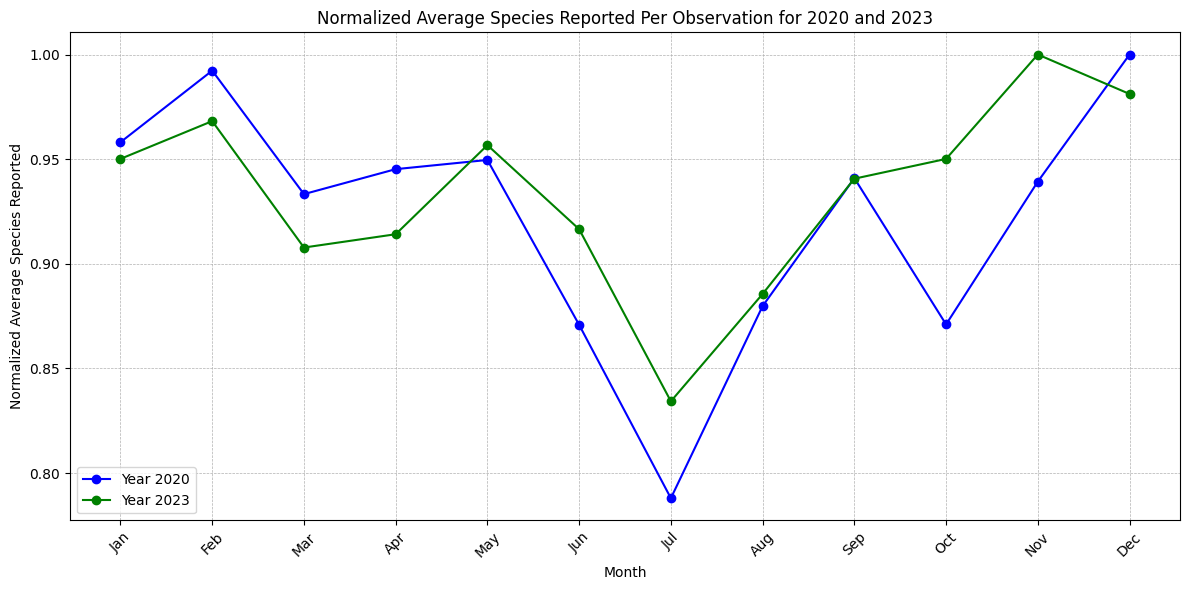

In [10]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import defaultdict
from datetime import datetime

# Load the filtered data from the JSON file
output_filename = 'C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/amp_geojsons/filtered_AMP_UT_Year_Avgs.json'  # Your output file path

with open(output_filename, 'r') as file:
    filtered_data = json.load(file)

# Extract features from the filtered data
features = filtered_data.get('features', [])

# Dictionary to store sum of species and number of observations per (year, month)
species_by_month = defaultdict(lambda: {'total_species': 0, 'num_observations': 0})

# Process each feature to extract the observation date and species reported
for feature in features:
    observation_date = feature['properties'].get('observation_date', '')
    species_reported = feature['properties'].get('species_reported', '0')

    # Convert species_reported to an integer (it may be a string in the data)
    try:
        species_reported = int(species_reported)
    except ValueError:
        continue  # Skip if species_reported is not a valid number
    
    # Extract the year and month from observation_date
    try:
        date_obj = datetime.strptime(observation_date, '%Y-%m-%d')
        year_month = date_obj.strftime('%Y-%m')  # Format as YYYY-MM
        species_by_month[year_month]['total_species'] += species_reported  # Add species to total
        species_by_month[year_month]['num_observations'] += 1  # Increment the observation count
    except ValueError:
        continue  # Skip if the date format is invalid

# Function to calculate the average species reported per month for a given year
def get_yearly_average(year):
    monthly_averages = []
    
    for month in range(1, 13):  # Loop through each month (1-12)
        year_month = f"{year}-{month:02d}"  # Format as 'YYYY-MM'
        
        if year_month in species_by_month:
            total_species = species_by_month[year_month]['total_species']
            num_observations = species_by_month[year_month]['num_observations']
            
            # Calculate the average species per observation
            if num_observations > 0:
                average_species = total_species / num_observations
            else:
                average_species = 0
        else:
            average_species = 0  # If no data for this month

        monthly_averages.append(average_species)
    
    return monthly_averages

# User input to choose two years for comparison
year_1 = input("Enter the first year for comparison (e.g., 2018): ")
year_2 = input("Enter the second year for comparison (e.g., 2019): ")

# Calculate the monthly averages for each selected year
avg_species_year_1 = get_yearly_average(year_1)
avg_species_year_2 = get_yearly_average(year_2)

# Normalize the average species counts (min-max scaling) for comparison
max_avg_1 = max(avg_species_year_1) if avg_species_year_1 else 1
max_avg_2 = max(avg_species_year_2) if avg_species_year_2 else 1

avg_species_year_1_normalized = [count / max_avg_1 for count in avg_species_year_1]
avg_species_year_2_normalized = [count / max_avg_2 for count in avg_species_year_2]

# Create the months for x-axis (January to December)
months = [datetime.strptime(f"{month:02d}", "%m").strftime('%b') for month in range(1, 13)]

# Plot the comparison
plt.figure(figsize=(12, 6))

# Plot data for the first year
plt.plot(months, avg_species_year_1_normalized, marker='o', linestyle='-', label=f'Year {year_1}', color='b')

# Plot data for the second year
plt.plot(months, avg_species_year_2_normalized, marker='o', linestyle='-', label=f'Year {year_2}', color='g')

# Add labels and title
plt.title(f'Normalized Average Species Reported Per Observation for {year_1} and {year_2}')
plt.xlabel('Month')
plt.ylabel('Normalized Average Species Reported')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
# plt.savefig('C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/climate_birds_viz/new_comparisons/2014_2015.png')
plt.show()


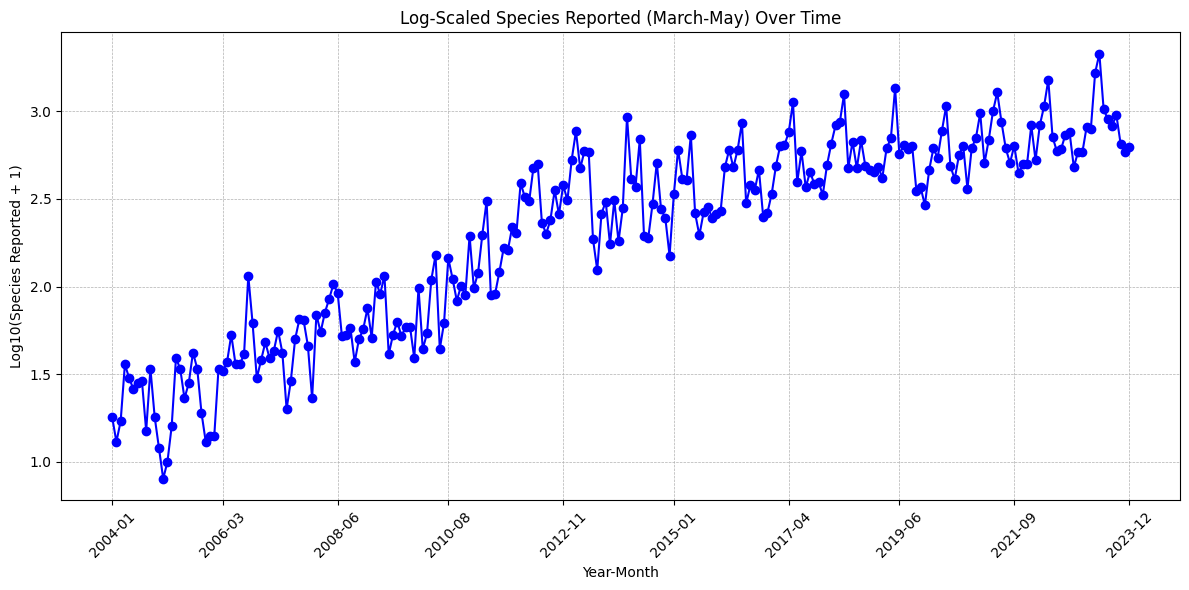

In [117]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from datetime import datetime

# Load the filtered data from the JSON file
output_filename = 'C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/amp_geojsons/filtered_AMP_UT_Year_Avgs.json'  # Your output file path

with open(output_filename, 'r') as file:
    filtered_data = json.load(file)

# Extract features from the filtered data
features = filtered_data.get('features', [])

# Dictionary to store species reported per (year, month)
species_by_month = defaultdict(int)

# Process each feature to extract the observation date and species reported
for feature in features:
    observation_date = feature['properties'].get('observation_date', '')
    species_reported = feature['properties'].get('species_reported', '0')

    # Convert species_reported to an integer (it may be a string in the data)
    try:
        species_reported = int(species_reported)
    except ValueError:
        continue  # Skip if species_reported is not a valid number
    
    # Extract the year and month from observation_date
    try:
        date_obj = datetime.strptime(observation_date, '%Y-%m-%d')
        year = date_obj.year
        month = date_obj.month
        
        # Filter for March (3), April (4), and May (5)
        # if month in [3, 4, 5]:
        species_by_month[(year, month)] += species_reported  # Sum species per (year, month)
    except ValueError:
        continue  # Skip if the date format is invalid

# Sort by (year, month)
sorted_keys = sorted(species_by_month.keys())
species_counts = [species_by_month[key] for key in sorted_keys]

# Apply log transformation (log(count + 1) to avoid log(0) issues)
species_counts_log = [np.log10(count + 1) for count in species_counts]  # Log base 10

# Create evenly spaced x-axis values
x_values = []
x_labels = []
x_index = 0  # Start an index counter for evenly spacing points

for (year, month) in sorted_keys:
    x_values.append(x_index)
    x_labels.append(f"{year}-{month:02d}")  # Format as YYYY-MM
    x_index += 1  # Increment index for even spacing

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(x_values, species_counts_log, marker='o', linestyle='-', color='b')

# Set custom x-axis labels
plt.xticks(ticks=np.linspace(0, len(x_values)-1, num=10, dtype=int), 
           labels=[x_labels[i] for i in np.linspace(0, len(x_labels)-1, num=10, dtype=int)], 
           rotation=45)  # Reduce the number of x-axis labels for readability

plt.title('Log-Scaled Species Reported (March-May) Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Log10(Species Reported + 1)')  # Indicating log transformation
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


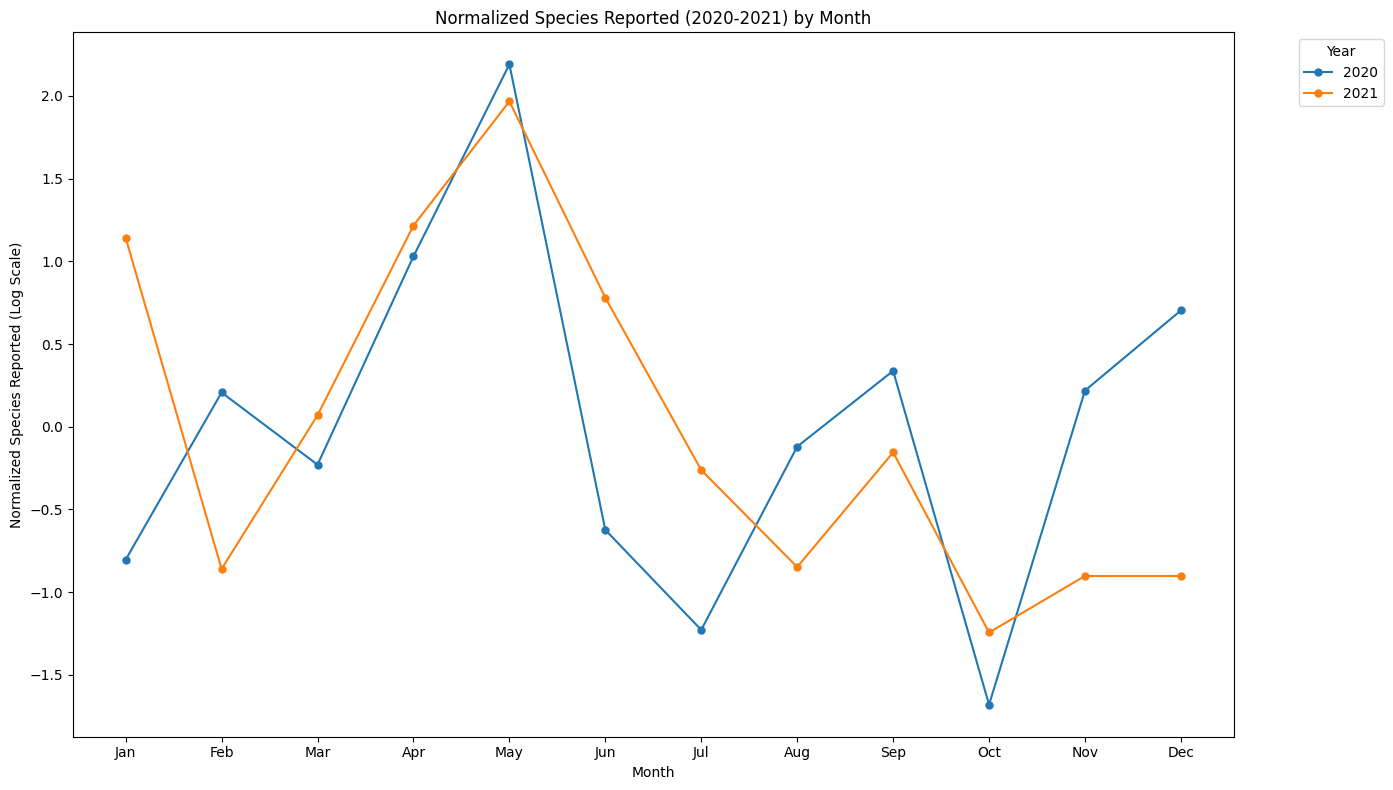

In [115]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from datetime import datetime
from sklearn.preprocessing import StandardScaler

# Load the filtered species data from the JSON file
output_filename = 'C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/amp_geojsons/filtered_AMP_UT_Year_Avgs.json'

with open(output_filename, 'r') as file:
    filtered_data = json.load(file)

# Extract features from the filtered data
features = filtered_data.get('features', [])

# Dictionary to store species reported per (year, month)
species_by_year_month = defaultdict(lambda: defaultdict(int))

# Process each feature to extract the observation date and species reported
for feature in features:
    observation_date = feature['properties'].get('observation_date', '')
    species_reported = feature['properties'].get('species_reported', '0')

    try:
        species_reported = int(species_reported)
    except ValueError:
        continue  # Skip invalid numbers

    try:
        date_obj = datetime.strptime(observation_date, '%Y-%m-%d')
        year = date_obj.year
        month = date_obj.month

        if 2004 <= year <= 2023:  # Consider all years between 2004 and 2023
            species_by_year_month[year][month] += species_reported
    except ValueError:
        continue  # Skip invalid dates

# Prepare data for plotting
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Collect species counts for each year
all_years = range(2020, 2022)
species_counts_all_years = {}

for year in all_years:
    species_counts_all_years[year] = [species_by_year_month[year].get(month, 0) for month in range(1, 13)]

# Normalize the data (log scale and then standardize)
scaler = StandardScaler()

# Combine all years' data to apply the same scaling
combined_data = np.array([species_counts_all_years[year] for year in all_years])

# Apply log scale to all years' counts
combined_data_log = np.log1p(combined_data)

# Normalize all years' log-scaled data
normalized_data = scaler.fit_transform(combined_data_log.T).T  # Normalize each month across the years

# Plot data
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the data for each year
for i, year in enumerate(all_years):
    ax.plot(months, normalized_data[i], label=str(year), marker='o', linestyle='-', markersize=5)

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Normalized Species Reported (Log Scale)')
ax.set_title('Normalized Species Reported (2020-2021) by Month')

# Add legend
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot with tight layout to prevent clipping of legend
plt.tight_layout()
plt.savefig('C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/climate_birds_viz/2020_2021.png')
plt.show()


C:\Users\u1355\AppData\Local\Temp\ipykernel_31868\3217544908.py:87: RuntimeWarning: invalid value encountered in log1p
  nino3_values_log = np.log1p(nino3_values)  # Apply log scale to SST data


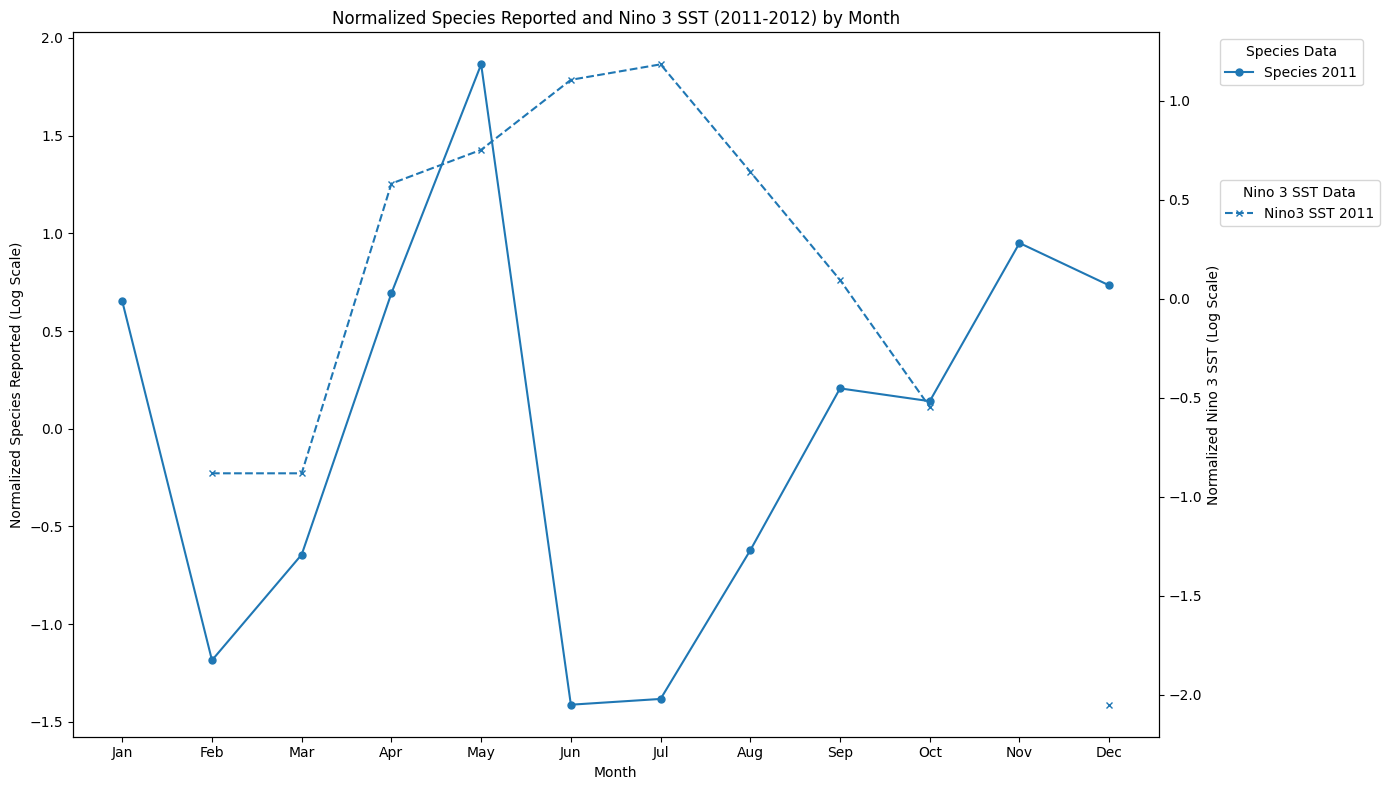

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from datetime import datetime
from sklearn.preprocessing import StandardScaler

# Load the filtered species data from the JSON file
output_filename = 'C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/amp_geojsons/filtered_AMP_UT_Year_Avgs.json'

with open(output_filename, 'r') as file:
    filtered_data = json.load(file)

# Extract features from the filtered data
features = filtered_data.get('features', [])

# Dictionary to store species reported per (year, month)
species_by_year_month = defaultdict(lambda: defaultdict(int))

# Process each feature to extract the observation date and species reported
for feature in features:
    observation_date = feature['properties'].get('observation_date', '')
    species_reported = feature['properties'].get('species_reported', '0')

    try:
        species_reported = int(species_reported)
    except ValueError:
        continue  # Skip invalid numbers

    try:
        date_obj = datetime.strptime(observation_date, '%Y-%m-%d')
        year = date_obj.year
        month = date_obj.month

        if 2011 <= year <= 2011:  # Consider 2011 and 2012 years
            species_by_year_month[year][month] += species_reported
    except ValueError:
        continue  # Skip invalid dates

# Prepare data for plotting
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Collect species counts for each year
all_years = range(2007, 2009)
species_counts_all_years = {}

for year in all_years:
    species_counts_all_years[year] = [species_by_year_month[year].get(month, 0) for month in range(1, 13)]

# Normalize the data (log scale and then standardize)
scaler = StandardScaler()

# Combine all years' data to apply the same scaling
combined_data = np.array([species_counts_all_years[year] for year in all_years])

# Apply log scale to all years' counts
combined_data_log = np.log1p(combined_data)

# Normalize all years' log-scaled data
normalized_data = scaler.fit_transform(combined_data_log.T).T  # Normalize each month across the years

# Load the Nino 3 SST data from the file
nino3_data = {}

with open('C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/climate_data/sst_data.txt', 'r') as file:
    next(file)  # Skip the header line
    for line in file:
        parts = line.strip().split()
        try:
            year = int(parts[0])
            month = int(parts[1])
            nino3 = float(parts[5])  # Nino3 data is at index 5 (0-based index)
            
            # Only extract data for years 2011 and 2012
            if 2011 <= year <= 2011:
                nino3_data[(year, month)] = nino3
        except ValueError:
            continue  # Skip invalid lines

# Extract Nino 3 SST values for the months of 2011-2012
nino3_values = []
for year in all_years:
    nino3_values.append([nino3_data.get((year, month), np.nan) for month in range(1, 13)])

# Normalize Nino 3 SST data
nino3_values = np.array(nino3_values)
nino3_values_log = np.log1p(nino3_values)  # Apply log scale to SST data
nino3_values_normalized = scaler.fit_transform(nino3_values_log.T).T  # Normalize

# Plot data
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot the species reported data
for i, year in enumerate(all_years):
    ax1.plot(months, normalized_data[i], label=f'Species {year}', marker='o', linestyle='-', markersize=5)

# Create another y-axis to plot the Nino 3 SST data
ax2 = ax1.twinx()

# Plot the Nino 3 SST data
for i, year in enumerate(all_years):
    ax2.plot(months, nino3_values_normalized[i], label=f'Nino3 SST {year}', marker='x', linestyle='--', markersize=5)

# Set labels and title
ax1.set_xlabel('Month')
ax1.set_ylabel('Normalized Species Reported (Log Scale)')
ax2.set_ylabel('Normalized Nino 3 SST (Log Scale)')

ax1.set_title('Normalized Species Reported and Nino 3 SST (2007-20) by Month')

# Add legends
ax1.legend(title='Species Data', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.legend(title='Nino 3 SST Data', bbox_to_anchor=(1.05, 0.8), loc='upper left')

# Show plot with tight layout to prevent clipping of legend
plt.tight_layout()
# plt.savefig('C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/climate_birds_viz/species_nino3_2011_2012.png')
plt.show()


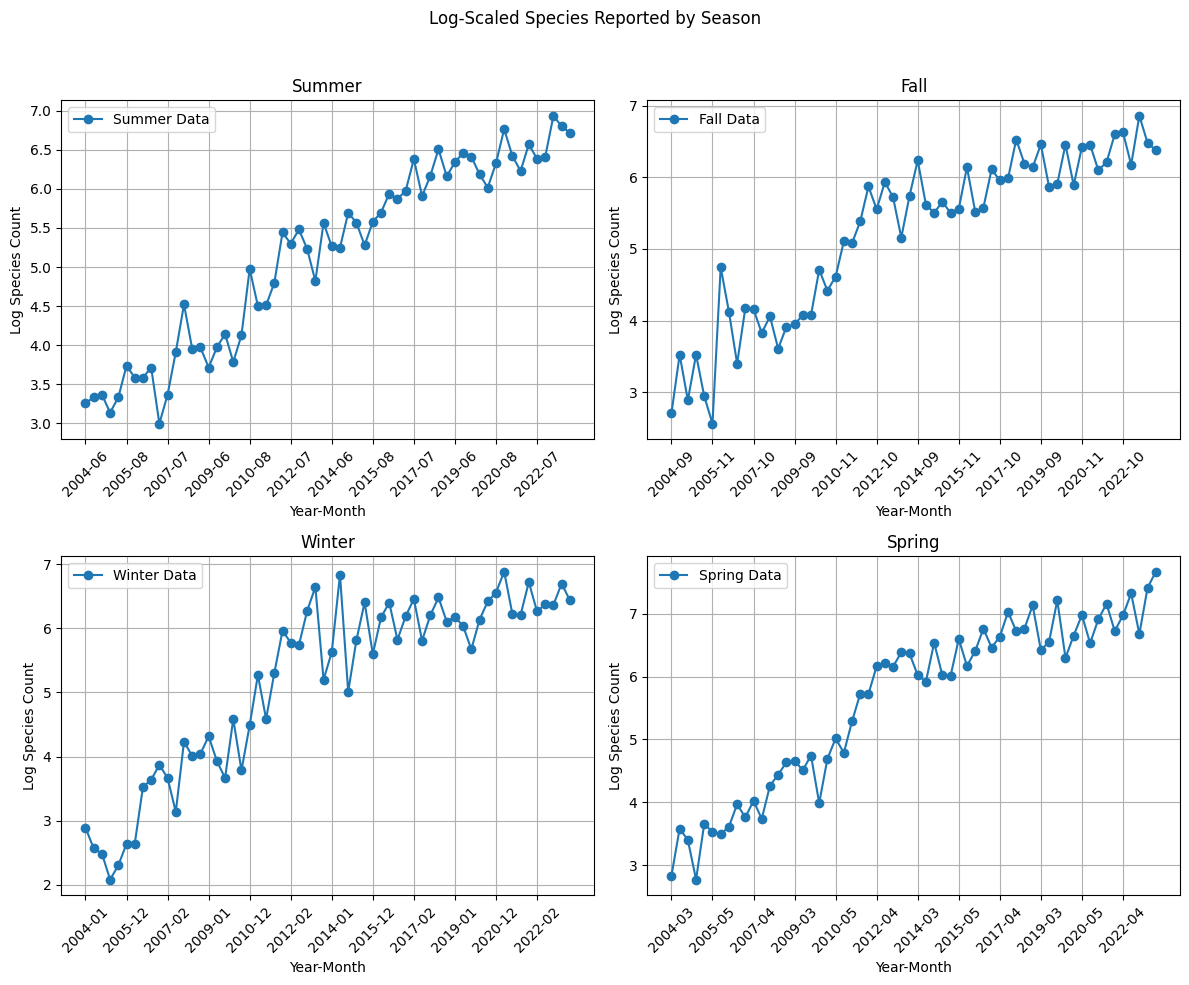

In [81]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from datetime import datetime
from sklearn.preprocessing import StandardScaler

# Load the filtered species data from the JSON file
output_filename = 'C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/amp_geojsons/filtered_AMP_UT_Year_Avgs.json'

with open(output_filename, 'r') as file:
    filtered_data = json.load(file)

# Extract features from the filtered data
features = filtered_data.get('features', [])

# Dictionary to store species reported per (year, month)
species_by_month = defaultdict(int)

# Process each feature to extract the observation date and species reported
for feature in features:
    observation_date = feature['properties'].get('observation_date', '')
    species_reported = feature['properties'].get('species_reported', '0')

    try:
        species_reported = int(species_reported)
    except ValueError:
        continue  # Skip invalid numbers

    try:
        date_obj = datetime.strptime(observation_date, '%Y-%m-%d')
        year = date_obj.year
        month = date_obj.month
        species_by_month[(year, month)] += species_reported
    except ValueError:
        continue  # Skip invalid dates

# Function to filter data by season
def get_seasonal_data(season_months):
    seasonal_keys = [key for key in species_by_month.keys() if key[1] in season_months]
    seasonal_keys.sort()
    seasonal_counts = [species_by_month[key] for key in seasonal_keys]
    return seasonal_keys, np.log1p(seasonal_counts)  # Apply log scale

# Define seasonal months
seasons = {
    "Summer": [6, 7, 8],
    "Fall": [9, 10, 11],
    "Winter": [12, 1, 2],
    "Spring": [3, 4, 5]
}

# Create the main figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Log-Scaled Species Reported by Season')
axes = axes.flatten()

# Generate plots for each season
for ax, (season, months) in zip(axes, seasons.items()):
    seasonal_keys, seasonal_counts = get_seasonal_data(months)
    
    if seasonal_keys:
        x_values = range(len(seasonal_keys))
        x_labels = [f"{year}-{month:02d}" for year, month in seasonal_keys]
        
        ax.plot(x_values, seasonal_counts, marker='o', linestyle='-', label=f'{season} Data')
        ax.set_xticks(x_values[::5])  # Reduce labels for clarity
        ax.set_xticklabels(x_labels[::5], rotation=45)
        ax.set_title(f'{season}')
        ax.set_ylabel('Log Species Count')
        ax.set_xlabel('Year-Month')
        ax.legend()
        ax.grid()

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.savefig('C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/climate_birds_viz/seasonal.png')
plt.show()

Pearson Correlation: -0.33, p-value: 0.160


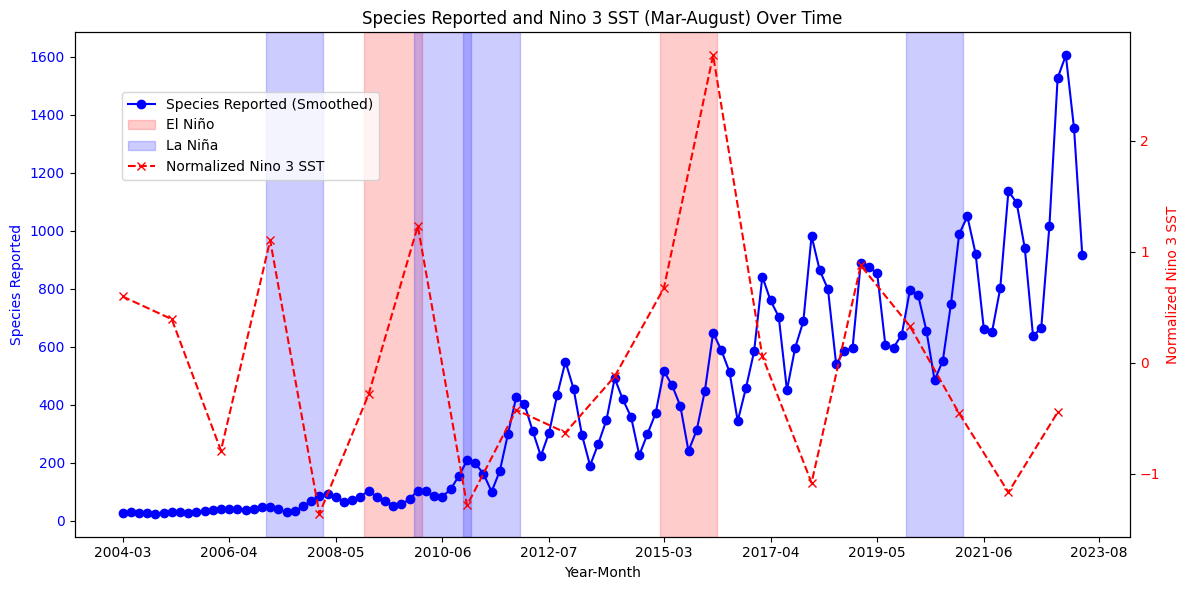

In [58]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

# Load the filtered species data from the JSON file
output_filename = 'C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/amp_geojsons/filtered_AMP_UT_Year_Avgs.json'

with open(output_filename, 'r') as file:
    filtered_data = json.load(file)

# Extract features from the filtered data
features = filtered_data.get('features', [])

# Dictionary to store species reported per (year, month)
species_by_month = defaultdict(int)

# Process each feature to extract the observation date and species reported
for feature in features:
    observation_date = feature['properties'].get('observation_date', '')
    species_reported = feature['properties'].get('species_reported', '0')

    try:
        species_reported = int(species_reported)
    except ValueError:
        continue  # Skip invalid numbers

    try:
        date_obj = datetime.strptime(observation_date, '%Y-%m-%d')
        year = date_obj.year
        month = date_obj.month

        if month in [3, 4, 5, 6, 7, 8]:  # Summer months
            species_by_month[(year, month)] += species_reported
    except ValueError:
        continue  # Skip invalid dates

# Sort and process species counts
sorted_keys = sorted(species_by_month.keys())
species_counts = [species_by_month[key] for key in sorted_keys]

# Apply a rolling average to smooth the species counts
window_size = 3
species_counts_smooth = np.convolve(species_counts, np.ones(window_size) / window_size, mode='valid')

# Generate x-axis values
x_values = []
x_labels = []
x_index = 0
year_to_x_value = {}

for (year, month) in sorted_keys:
    if year not in year_to_x_value:
        year_to_x_value[year] = x_index  # Store first x-index for each year

    x_values.append(x_index)
    x_labels.append(f"{year}-{month:02d}")
    x_index += 1

# Load Nino 3 SST data
nino3_data = {}
with open('C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/climate_data/sst_data.txt', 'r') as file:
    next(file)  # Skip header
    for line in file:
        parts = line.strip().split()
        try:
            year = int(parts[0])
            month = int(parts[1])
            nino3 = float(parts[5])  # Corrected column index

            if 2004 <= year <= 2023 and month == 1:  # Use January values
                nino3_data[year] = nino3
        except ValueError:
            continue

# Normalize Nino 3 values
scaler = StandardScaler()
nino3_values = [nino3_data.get(year, None) for year in sorted(year_to_x_value.keys())]
nino3_values_scaled = scaler.fit_transform(np.array(nino3_values).reshape(-1, 1)).flatten()

# Create x-values for SST data
nino3_x_values = [year_to_x_value[year] for year in sorted(year_to_x_value.keys())]

# Correlation analysis
common_indices = [i for i in range(len(nino3_values_scaled)) if nino3_values_scaled[i] is not None]
species_corr_values = [species_counts[i] for i in common_indices]
nino3_corr_values = [nino3_values_scaled[i] for i in common_indices]

if len(species_corr_values) > 1:
    correlation, p_value = pearsonr(species_corr_values, nino3_corr_values)
    print(f"Pearson Correlation: {correlation:.2f}, p-value: {p_value:.3f}")
else:
    print("Not enough data for correlation analysis.")

# Define La Niña & El Niño periods
la_nina_periods = [(2007, 2008), (2010, 2011), (2011, 2012), (2020, 2021)]
el_nino_periods = [(2009, 2010), (2015, 2016), (2023, 2024)]

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot species data with rolling average
ax1.plot(x_values[:len(species_counts_smooth)], species_counts_smooth, 
         marker='o', linestyle='-', color='b', label='Species Reported (Smoothed)')
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Species Reported', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot Nino 3 SST (normalized) at correct positions
ax2 = ax1.twinx()
ax2.plot(nino3_x_values, nino3_values_scaled, marker='x', linestyle='--', color='r', label='Normalized Nino 3 SST')
ax2.set_ylabel('Normalized Nino 3 SST', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Highlight El Niño and La Niña periods
for start, end in el_nino_periods:
    start_idx = year_to_x_value.get(start, None)
    end_idx = year_to_x_value.get(end, None)
    if start_idx is not None and end_idx is not None:
        ax1.axvspan(start_idx - 0.5, end_idx + 0.5, color='red', alpha=0.2, label="El Niño" if start == 2009 else "")

for start, end in la_nina_periods:
    start_idx = year_to_x_value.get(start, None)
    end_idx = year_to_x_value.get(end, None)
    if start_idx is not None and end_idx is not None:
        ax1.axvspan(start_idx - 0.5, end_idx + 0.5, color='blue', alpha=0.2, label="La Niña" if start == 2007 else "")

# Set custom x-axis labels
plt.xticks(ticks=np.linspace(0, len(x_values)-1, num=10, dtype=int), 
           labels=[x_labels[i] for i in np.linspace(0, len(x_labels)-1, num=10, dtype=int)], 
           rotation=45)

# Set title and grid
plt.title('Species Reported and Nino 3 SST (Mar-August) Over Time')
fig.tight_layout()

# Add legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.85))

# Show the plot
plt.savefig('C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/climate_birds_viz/mar-aug_nolog.png')
plt.show()


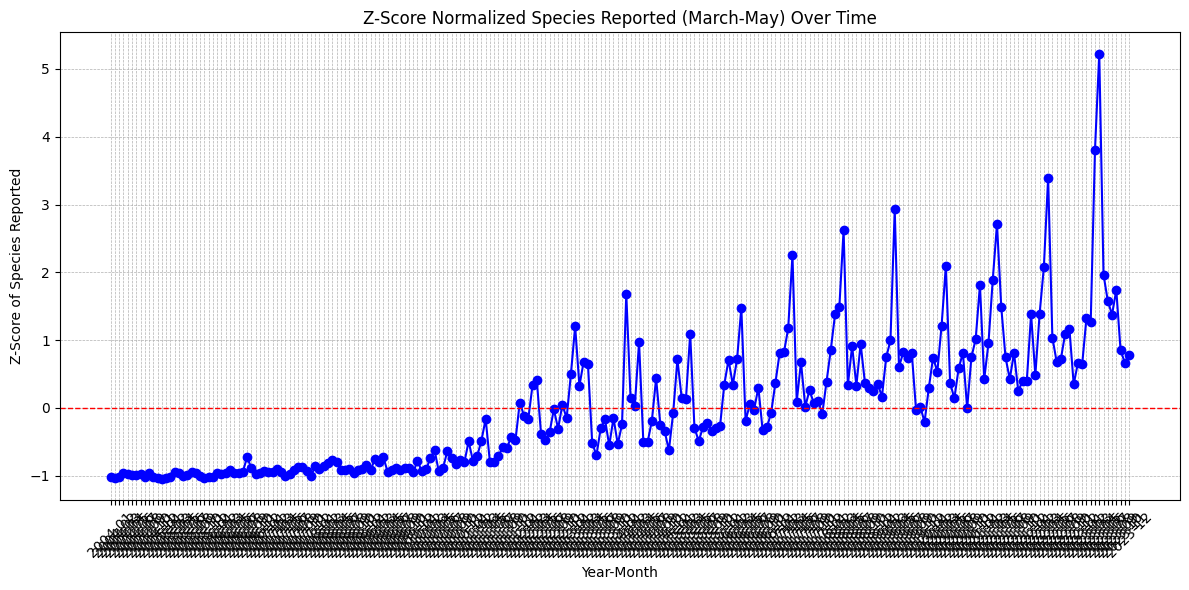

In [22]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from datetime import datetime

# Load the filtered data from the JSON file
output_filename = 'C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/amp_geojsons/filtered_AMP_UT_Year_Avgs.json'  # Your output file path

with open(output_filename, 'r') as file:
    filtered_data = json.load(file)

# Extract features from the filtered data
features = filtered_data.get('features', [])

# Dictionary to store species reported per (year, month)
species_by_month = defaultdict(int)

# Process each feature to extract the observation date and species reported
for feature in features:
    observation_date = feature['properties'].get('observation_date', '')
    species_reported = feature['properties'].get('species_reported', '0')

    # Convert species_reported to an integer (it may be a string in the data)
    try:
        species_reported = int(species_reported)
    except ValueError:
        continue  # Skip if species_reported is not a valid number
    
    # Extract the year and month from observation_date
    try:
        date_obj = datetime.strptime(observation_date, '%Y-%m-%d')
        year = date_obj.year
        month = date_obj.month
        
        # Filter for March (3), April (4), and May (5)
        # if month in [3, 4, 5]:
        species_by_month[(year, month)] += species_reported  # Sum species per (year, month)
    except ValueError:
        continue  # Skip if the date format is invalid

# Sort by (year, month)
sorted_keys = sorted(species_by_month.keys())
species_counts = np.array([species_by_month[key] for key in sorted_keys])

# Compute Z-score normalization
mean_species = np.mean(species_counts)
std_species = np.std(species_counts)

# Avoid division by zero
if std_species > 0:
    species_counts_zscore = (species_counts - mean_species) / std_species
else:
    species_counts_zscore = species_counts - mean_species  # If std=0, just center the data

# Create evenly spaced x-axis values
x_values = []
x_labels = []
x_index = 0  # Start an index counter for evenly spacing points

for (year, month) in sorted_keys:
    x_values.append(x_index)
    x_labels.append(f"{year}-{month:02d}")  # Format as YYYY-MM
    x_index += 1  # Increment index for even spacing

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(x_values, species_counts_zscore, marker='o', linestyle='-', color='b')

# Set custom x-axis labels
plt.xticks(ticks=x_values, labels=x_labels, rotation=45)  # Rotate labels for readability

plt.title('Z-Score Normalized Species Reported (March-May) Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Z-Score of Species Reported')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)  # Add a reference line at Z=0
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


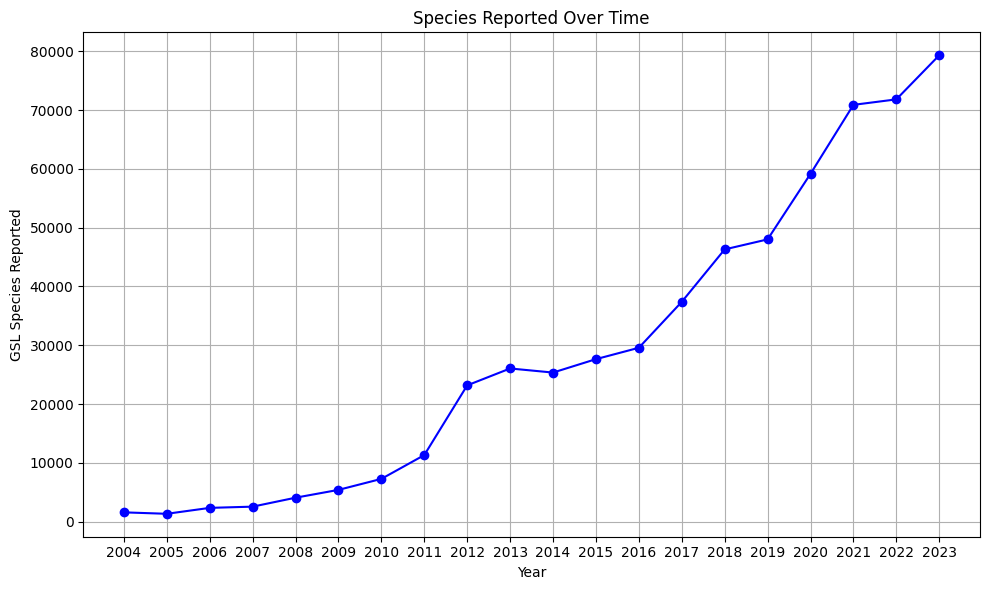

In [6]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime

# Load the filtered data from the JSON file
output_filename = 'C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/amp_geojsons/AMP_UT_Year_Avgs.json'  # Your output file path

with open(output_filename, 'r') as file:
    filtered_data = json.load(file)

# Extract features from the filtered data
features = filtered_data.get('features', [])

# Initialize a dictionary to count species reported per year
species_by_year = defaultdict(int)

# Process each feature to extract the observation date and species reported
for feature in features:
    observation_date = feature['properties'].get('observation_date', '')
    species_reported = feature['properties'].get('species_reported', '0')

    # Convert species_reported to an integer (it may be a string in the data)
    try:
        species_reported = int(species_reported)
    except ValueError:
        continue  # Skip if species_reported is not a valid number
    
    # Extract the year from observation_date (assuming format is YYYY-MM-DD)
    try:
        date_obj = datetime.strptime(observation_date, '%Y-%m-%d')
        year = date_obj.year
        species_by_year[year] += species_reported  # Sum species reported for each year
    except ValueError:
        continue  # Skip if the date format is invalid

# Sort years in ascending order
years = sorted(species_by_year.keys())
species_count = [species_by_year[year] for year in years]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(years, species_count, marker='o', linestyle='-', color='b')
plt.title('Species Reported Over Time')
plt.xlabel('Year')
plt.ylabel('GSL Species Reported')
plt.xticks(years)  # Show all years on the x-axis
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


First 10 species reported values: [1, 1, 1, 1, 0, 0, 1, 1, 1, 1]
Unique species_reported values: {0, 1}
Collected 104672 observation dates and 104672 species reported


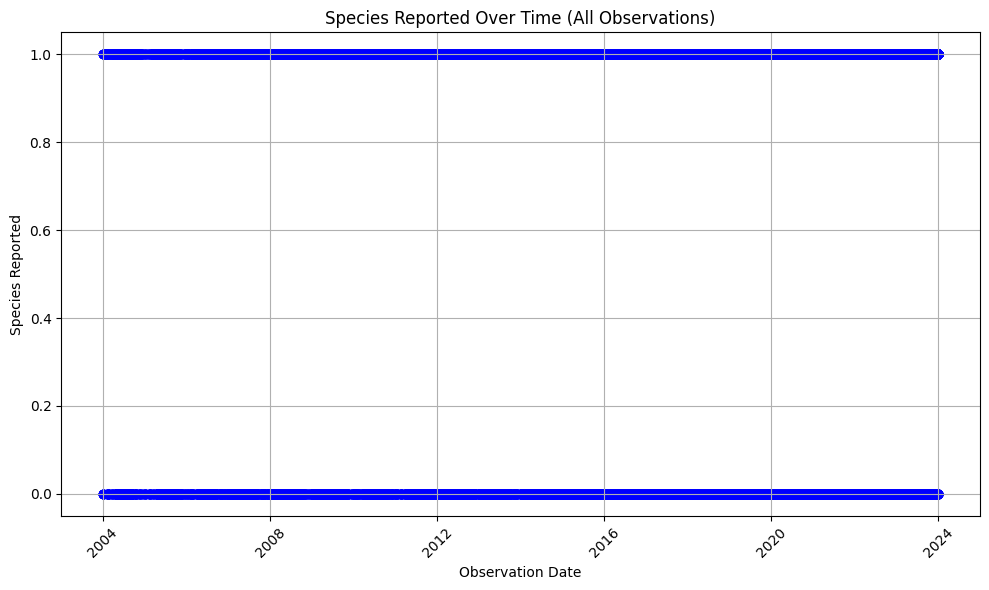

In [5]:
import json
import matplotlib.pyplot as plt
from datetime import datetime

# Load the filtered data from the JSON file
output_filename = 'C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/amp_geojsons/filtered_AMP_UT_Year_Avgs.json'  # Your output file path

with open(output_filename, 'r') as file:
    filtered_data = json.load(file)

# Extract features from the filtered data
features = filtered_data.get('features', [])

# Lists to store observation dates and species reported
dates = []
species_reported_list = []

# Process each feature to extract the observation date and species reported
for feature in features:
    observation_date = feature['properties'].get('observation_date', '')
    species_reported = feature['properties'].get('species_reported', '0')

    # Convert species_reported to an integer (it may be a string in the data)
    try:
        species_reported = int(species_reported)
    except ValueError:
        continue  # Skip if species_reported is not a valid number
    
    # Ensure that the date is in valid format (YYYY-MM-DD)
    try:
        date_obj = datetime.strptime(observation_date, '%Y-%m-%d')
        dates.append(date_obj)
        species_reported_list.append(species_reported)
    except ValueError:
        continue  # Skip if the date format is invalid

# Debug: Check the first few values of species_reported to see if there's variation
print(f"First 10 species reported values: {species_reported_list[:10]}")
print(f"Unique species_reported values: {set(species_reported_list)}")

# Debug: Check if the dates and species_reported are being collected correctly
print(f"Collected {len(dates)} observation dates and {len(species_reported_list)} species reported")

# Check if the lists are not empty
if len(dates) == 0 or len(species_reported_list) == 0:
    print("No valid data found to plot.")
else:
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(dates, species_reported_list, color='b', marker='o')  # Scatter plot for individual dates
    plt.title('Species Reported Over Time (All Observations)')
    plt.xlabel('Observation Date')
    plt.ylabel('Species Reported')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()


In [13]:
import geojson
import xarray as xr
import numpy as np

def netcdf_to_geojson(nc_file, lon_variable, lat_variable, data_variable, geojson_name, time_index=0):
    """
    Converts a NetCDF file to a GeoJSON file using the provided longitude, latitude, and data variable.
    Optionally, specify the time index to select data from a specific time step.

    Parameters:
    nc_file: str - Path to the NetCDF file
    lon_variable: str - The name of the longitude variable in the NetCDF file
    lat_variable: str - The name of the latitude variable in the NetCDF file
    data_variable: str - The name of the data variable (e.g., SST) in the NetCDF file
    geojson_name: str - The name of the output GeoJSON file
    time_index: int - The index of the time step to use (default is 0, the first time step)
    """
    
    # Open the NetCDF file using xarray
    ds = xr.open_dataset(nc_file)
    
    # Extract the latitude, longitude, and data arrays
    latitudes = ds[lat_variable].values
    longitudes = ds[lon_variable].values
    
    # Check if the data has a time dimension and select the specific time step
    if 'time' in ds.dims:
        data = ds[data_variable].isel(time=time_index).values  # Select data for the specific time index
    else:
        data = ds[data_variable].values  # No time dimension, just use the whole array
    
    # Prepare GeoJSON features
    geojson_features = []
    
    # Loop over the latitude and longitude indices
    for i in range(len(latitudes)):
        for j in range(len(longitudes)):
            # Extract the corresponding latitude, longitude, and data value
            lat = latitudes[i]
            lon = longitudes[j]
            data_value = data[i, j]
            
            # Convert data_value to a standard Python float (not numpy.float32)
            data_value = float(data_value)  # Make sure to explicitly convert
            
            # Create a GeoJSON Point feature for each (lat, lon) pair
            point = geojson.Point((lon, lat))
            properties = {data_variable: data_value}  # Store the data value as a property
            feature = geojson.Feature(geometry=point, properties=properties)
            
            # Append the feature to the list
            geojson_features.append(feature)
    
    # Create a GeoJSON FeatureCollection
    geojson_collection = geojson.FeatureCollection(geojson_features)
    
    # Write the GeoJSON file
    with open(geojson_name, 'w') as f:
        geojson.dump(geojson_collection, f)
    
    print(f"GeoJSON file saved as {geojson_name}")

In [14]:
netcdf_to_geojson(
    nc_file='C:/Users/u1355/OneDrive/Desktop/Data Viz/Thesis Website/birds/climate_data/HadISST_sst.nc',
    lon_variable='longitude',
    lat_variable='latitude',
    data_variable='sst',
    geojson_name='sst_2004_2023.geojson',
    time_index=0  # Use the first time index (change it if needed)
)

TypeError: Object of type float32 is not JSON serializable